# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Utility Functions

In [132]:
def get_mse(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

def get_rmse(y_real, y_pred):
    return np.sqrt(get_mse(y_real, y_pred))

def standardize_data(data, mean=None, std=None):
    if mean is None:
        mean = data.mean(axis=0)
    if std is None:
        std = data.std(axis=0)

    norm_data = (data - mean) / std
    return norm_data, mean, std

def inverse_standardize_data(norm_data, mean, std):
    original_data = (norm_data * std) + mean
    return original_data

# Question 1

In [4]:
data = np.genfromtxt('./artificial1d.csv', delimiter=',')
data[:5,:]

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695]])

## Item a) 
Show the model parameters and the MSE (Mean Squared Error) obtained by OLS (Ordinary Least Squares) method. Plot the result line over the data.

In [557]:
def linear_regression_ols(X, y):
    w_hat = (np.linalg.inv(X.T @ X) @ X.T) @ y
    return w_hat.ravel()

In [6]:
X = np.hstack([np.ones((len(data), 1)), data[:,[0]]])
y = data[:,[1]]

In [7]:
w = linear_regression_ols(X, y)

print('Coeficients of Linear Regression Using Ordinary Least Squares Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))


Coeficients of Linear Regression Using Ordinary Least Squares Method:
Intercept:	0.067618
X(1):    	1.574865

#--- Metrics ---#
MSE: 0.21340090132936987
RMSE: 0.46195335406225796


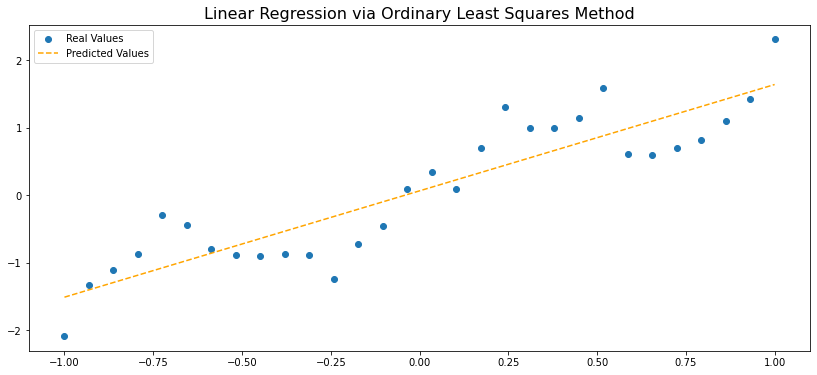

In [8]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Ordinary Least Squares Method', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

## Item b) 
Show the model parameters, the MSE and the learning curve obtained by Gradient Descent method. Plot the result line over the data.

In [531]:
def linear_regression_gd(X, y, alfa=0.1, n_iterations=1000):

    np.random.seed(123142)
    w = np.random.uniform(0, 10, X.shape[1])

    count = 0
    learning_curve = []
    while count < n_iterations:
        e = (y.ravel() - X @ w) 
        w = w + (1/len(y)) * alfa * (e @ X) 

        y_pred = (X @ w)
        learning_curve.append(get_mse(y, y_pred))

        count+=1

    # print(w * X_std + X_mean)
    return np.array(w), learning_curve

In [10]:
X = np.hstack([np.ones((data.shape[0], 1)), data[:, [0]]])
y = data[:, [1]]

In [11]:
w, learning_curve_gd = linear_regression_gd(X, y, alfa=0.1, n_iterations=200)

print('Coeficients of Linear Regression Using Gradient Descent Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))

Coeficients of Linear Regression Using Gradient Descent Method:
Intercept:	0.067618
X(1):    	1.576966

#--- Metrics ---#
MSE: 0.21340247414512706
RMSE: 0.4619550564125552


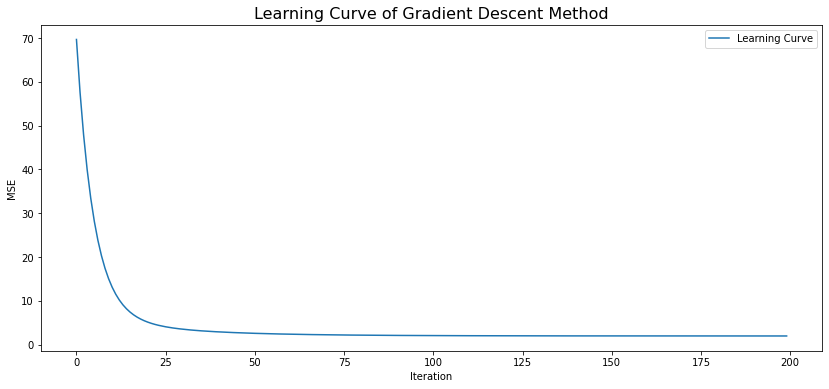

In [19]:
fig = plt.figure(figsize=(14, 6))
plt.title('Learning Curve of Gradient Descent Method', fontsize=16)
# plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(learning_curve_gd, label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE')
# plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

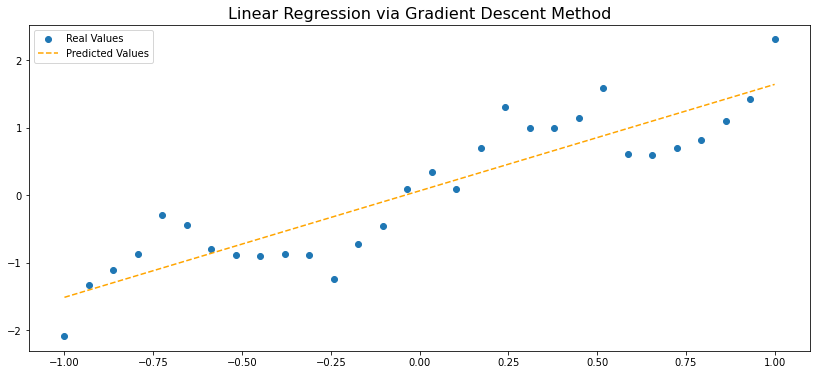

In [13]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Gradient Descent Method', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

## Item c) 
Show the model parameters, the MSE and the learning curve obtained by Stocastic Gradient Descent method. Plot the result line over the data.

In [534]:
def linear_regression_sgd(X, y, alfa=0.1, n_iterations=1000):

    np.random.seed(123142)
    w = np.random.uniform(0, 10, X.shape[1])
    random_indexes = np.random.randint(0, X.shape[0], n_iterations)

    count = 0
    learning_curve = []
    while count < n_iterations:
        
        random_X = X[[random_indexes[count]]]
        random_y = y[[random_indexes[count]]]

        e = (random_y.ravel() - random_X @ w).reshape(-1, 1)
        w = (w + alfa * (e * random_X)).ravel()

        y_pred = (w @ X.T)
        learning_curve.append(get_mse(y, y_pred))

        count+=1

    return np.array(w), learning_curve

In [15]:
X = np.hstack([np.ones((data.shape[0], 1)), data[:, [0]]])
y = data[:, [1]]

In [16]:
w, learning_curve_sgd = linear_regression_sgd(X, y, alfa=0.1, n_iterations=200)

print('Coeficients of Linear Regression Using Stocastic Gradient Descent Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))

Coeficients of Linear Regression Using Stocastic Gradient Descent Method:
Intercept:	0.040270
X(1):    	1.624766

#--- Metrics ---#
MSE: 0.21503606463698174
RMSE: 0.46371981264226975


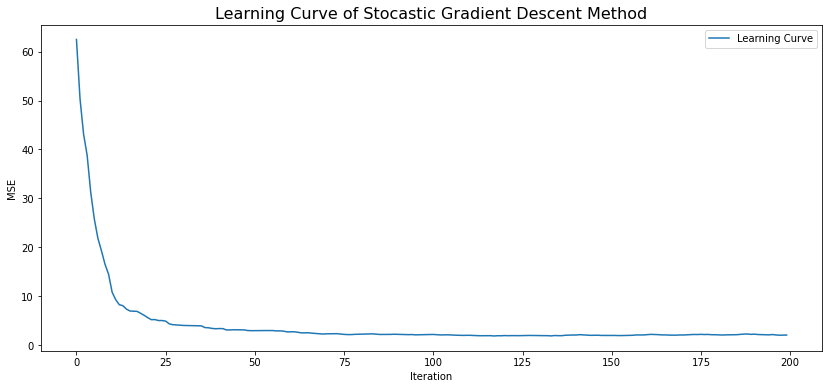

In [20]:
fig = plt.figure(figsize=(14, 6))
plt.title('Learning Curve of Stocastic Gradient Descent Method', fontsize=16)
plt.plot(learning_curve_sgd, label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Learning Curves Compare

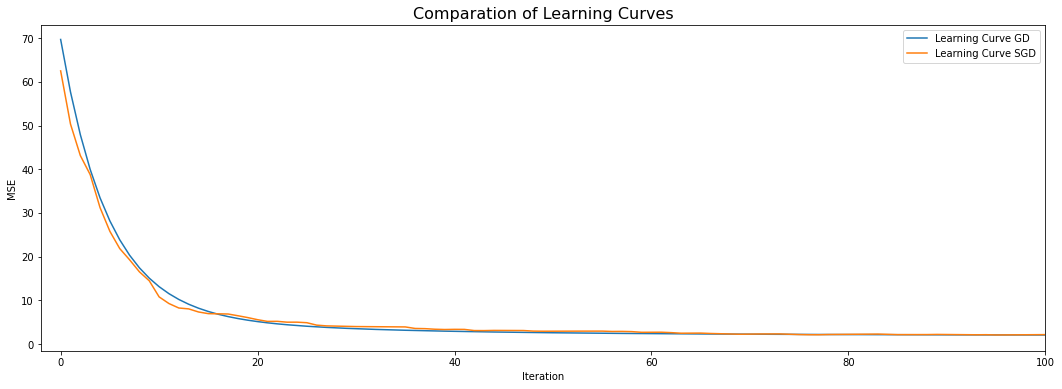

In [21]:
fig = plt.figure(figsize=(18, 6))
plt.title('Comparation of Learning Curves', fontsize=16)
plt.plot(learning_curve_gd, label='Learning Curve GD')
plt.plot(learning_curve_sgd, label='Learning Curve SGD')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.xlim(-2, 100)
plt.legend()
plt.show()

# Question 2

In [558]:
california_data = np.genfromtxt('./california.csv', delimiter=',')
california_data

array([[   4.1685    ,   20.        ,    6.70063694, ...,   38.8       ,
        -121.15      ,    2.175     ],
       [   2.8194    ,   24.        ,    4.7625    , ...,   36.75      ,
        -119.85      ,    0.811     ],
       [   2.425     ,   46.        ,    4.92771084, ...,   36.33      ,
        -119.31      ,    0.849     ],
       ...,
       [   6.4755    ,   36.        ,    5.81294964, ...,   34.01      ,
        -118.45      ,    4.058     ],
       [   3.5353    ,   34.        ,    6.31415929, ...,   37.97      ,
        -122.3       ,    1.647     ],
       [   1.2545    ,   41.        ,    4.30601093, ...,   36.75      ,
        -119.76      ,    0.455     ]])

In [607]:
def train_test_split(data, train_size_perc, random_seed=4658):
    N = data.shape[0]
    train_size = int(train_size_perc * N)

    indexes = np.arange(0, N, 1)

    np.random.seed(random_seed)
    train_idx = np.random.choice(indexes, train_size, replace=False)
    test_idx = np.delete(indexes, train_idx)

    train_data = data[train_idx]
    test_data = data[test_idx]

    X_train = train_data[:,:-1]
    y_train = train_data[:,[-1]]

    X_test = test_data[:,:-1]
    y_test = test_data[:,[-1]]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(california_data, 0.8)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (4000, 8)
y_train shape: (4000, 1)
X_test shape: (1000, 8)
y_test shape: (1000, 1)


In [608]:
X_train_norm, X_train_mean, X_train_std = standardize_data(X_train)
y_train_norm, y_train_mean, y_train_std = standardize_data(y_train)

X_test_norm, _, _ = standardize_data(X_test, X_train_mean, X_train_std)
y_test_norm, _, _ = standardize_data(y_test, y_train_mean, y_train_std)

In [611]:
def prepare_to_polynomial_regression(X, polynomial_degree):

    X_poly = np.hstack([np.ones((X.shape[0], 1)), X])

    if polynomial_degree > 1:
        for i in range(2, polynomial_degree+1):
            X_poly = np.hstack([X_poly, X**i])
        
    return X_poly


rmse_train_list = []
rmse_test_list = []

for i in range(11):
    print(f'\n\n#--- Polynomial Regression - Degree {i+1} ---#')
    X_train_norm_poly = prepare_to_polynomial_regression(X_train_norm, i+1)
    w = linear_regression_ols(X_train_norm_poly, y_train_norm).reshape(-1, 1)
    # w = np.linalg.lstsq(X_train_norm_poly, y_train_norm)[0]
    
    # print(np.hstack([w.reshape(-1, 1).round(4), w_1.round(4)])[:5])
    # print(w)
    # print(X_train_norm_poly.shape)
    # print(w.shape)

    y_train_norm_pred = X_train_norm_poly @ w
    y_train_pred = inverse_standardize_data(y_train_norm_pred, y_train_mean, y_train_std)
    
    rmse_train = get_rmse(y_train, y_train_pred)
    rmse_train_list.append([i+1, rmse_train])
    print('MSE Train:', rmse_train)

    X_test_norm_poly = prepare_to_polynomial_regression(X_test_norm, i+1)
    y_test_norm_pred = X_test_norm_poly @ w
    y_test_pred = inverse_standardize_data(y_test_norm_pred, y_train_mean, y_train_std)

    rmse_test = get_rmse(y_test, y_test_pred)
    rmse_test_list.append([i+1, rmse_test])
    print('MSE Test:', rmse_test)

rmse_train_list = np.array(rmse_train_list)
rmse_test_list = np.array(rmse_test_list)



#--- Polynomial Regression - Degree 1 ---#
MSE Train: 0.7322793693661311
MSE Test: 0.6839888776664395


#--- Polynomial Regression - Degree 2 ---#
MSE Train: 0.6774153078032956
MSE Test: 0.636281942629775


#--- Polynomial Regression - Degree 3 ---#
MSE Train: 0.6475574813681721
MSE Test: 0.6114577353015901


#--- Polynomial Regression - Degree 4 ---#
MSE Train: 0.6282081352235238
MSE Test: 0.5991845090106644


#--- Polynomial Regression - Degree 5 ---#
MSE Train: 3.5887737949488954
MSE Test: 3.6893958066832226


#--- Polynomial Regression - Degree 6 ---#
MSE Train: 7.54809349158302
MSE Test: 7.785195130840042


#--- Polynomial Regression - Degree 7 ---#
MSE Train: 2.766876800219686
MSE Test: 2.8664893536111866


#--- Polynomial Regression - Degree 8 ---#
MSE Train: 4.935814671865767
MSE Test: 4.978395980171865


#--- Polynomial Regression - Degree 9 ---#
MSE Train: 9.189542609719602
MSE Test: 9.243113059768469


#--- Polynomial Regression - Degree 10 ---#
MSE Train: 2808.22213978517

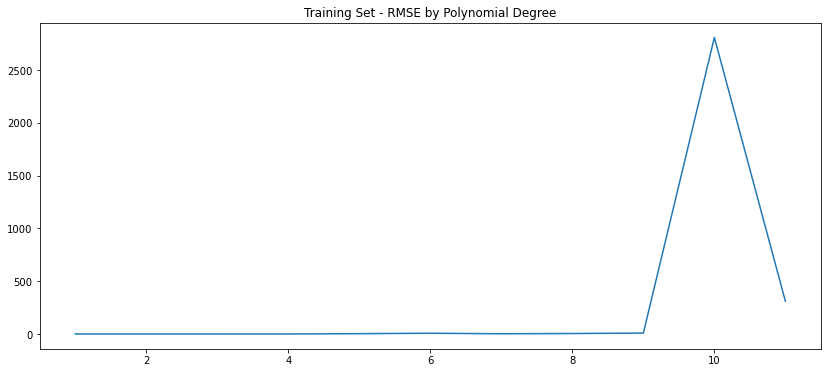

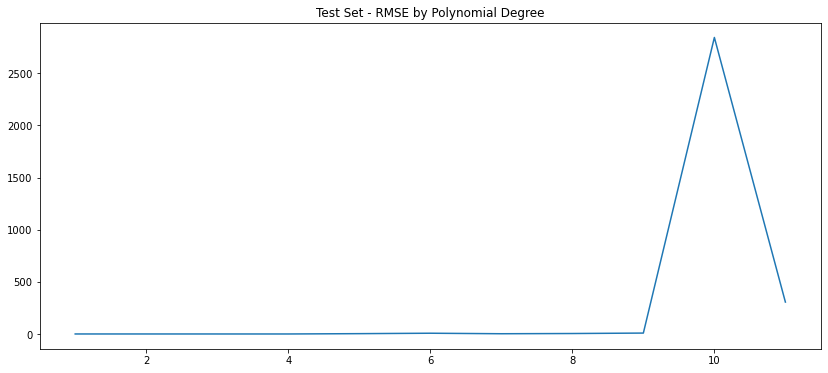

In [612]:
plt.figure(figsize=(14,6))
plt.title('Training Set - RMSE by Polynomial Degree')
plt.plot(rmse_train_list[:, 0], rmse_train_list[:, 1])
# plt.ylim(0, 20)
plt.figure(figsize=(14,6))
plt.title('Test Set - RMSE by Polynomial Degree')
plt.plot(rmse_test_list[:, 0], rmse_test_list[:, 1])
# plt.ylim(0, 20)

## With L2 Regularization

In [ ]:
rmse_train_list = []
rmse_test_list = []

for i in range(11):
    print(f'\n\n#--- Polynomial Regression - Degree {i+1} ---#')
    X_train_norm_poly = prepare_to_polynomial_regression(X_train_norm, i+1)
    w = linear_regression_ols(X_train_norm_poly, y_train_norm).reshape(-1, 1)
    # w = np.linalg.lstsq(X_train_norm_poly, y_train_norm)[0]
    
    # print(np.hstack([w.reshape(-1, 1).round(4), w_1.round(4)])[:5])
    # print(w)
    # print(X_train_norm_poly.shape)
    # print(w.shape)

    y_train_norm_pred = X_train_norm_poly @ w
    y_train_pred = inverse_standardize_data(y_train_norm_pred, y_train_mean, y_train_std)
    
    rmse_train = get_rmse(y_train_norm, y_train_norm_pred)
    rmse_train_list.append([i+1, rmse_train])
    print('MSE Train:', rmse_train)

    X_test_norm_poly = prepare_to_polynomial_regression(X_test_norm, i+1)
    y_test_norm_pred = X_test_norm_poly @ w
    y_test_pred = inverse_standardize_data(y_test_norm_pred, y_train_mean, y_train_std)

    rmse_test = get_rmse(y_test, y_test_pred)
    rmse_test_list.append([i+1, rmse_test])
    print('MSE Test:', rmse_test)

rmse_train_list = np.array(rmse_train_list)
rmse_test_list = np.array(rmse_test_list)

In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_norm, y_norm)
print(lr.intercept_)
print(lr.coef_)

[-3.75617269e-14]
[[ 0.73974142  0.11816427 -0.25028529  0.26680206 -0.01079144 -0.05535698
  -0.76723441 -0.7432809 ]]


In [48]:
X_t = np.array([[1,2,3]])
X_t**4

array([[ 1, 16, 81]], dtype=int32)

In [42]:
X
linear_regression_ols(X, y)

pred

array([ 5.32721923e-01,  1.65832235e-02, -2.25482040e-01,  1.09559068e+00,
        9.43125611e-07, -4.26609301e-03, -5.52791195e-02, -1.28270310e-02])